<a href="https://colab.research.google.com/github/akikohaku/Machine_Vision/blob/main/Tutorial_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from scipy import ndimage # multidimensional image processing
from skimage.color import rgb2hsv # image processing algorithms

1. Read in images
2. Convert to greyscale
3. Histogram equalisation

Text(0.5, 1.0, 'hist equalised')

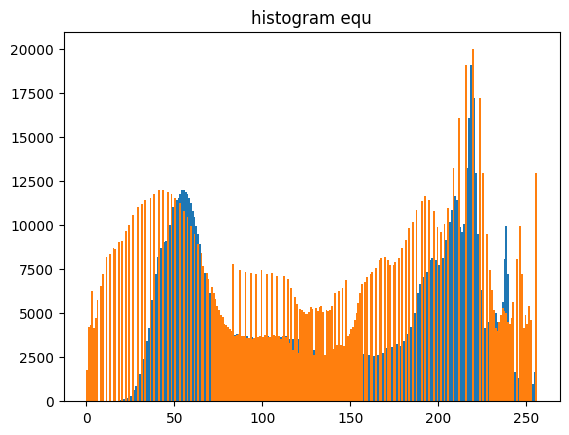

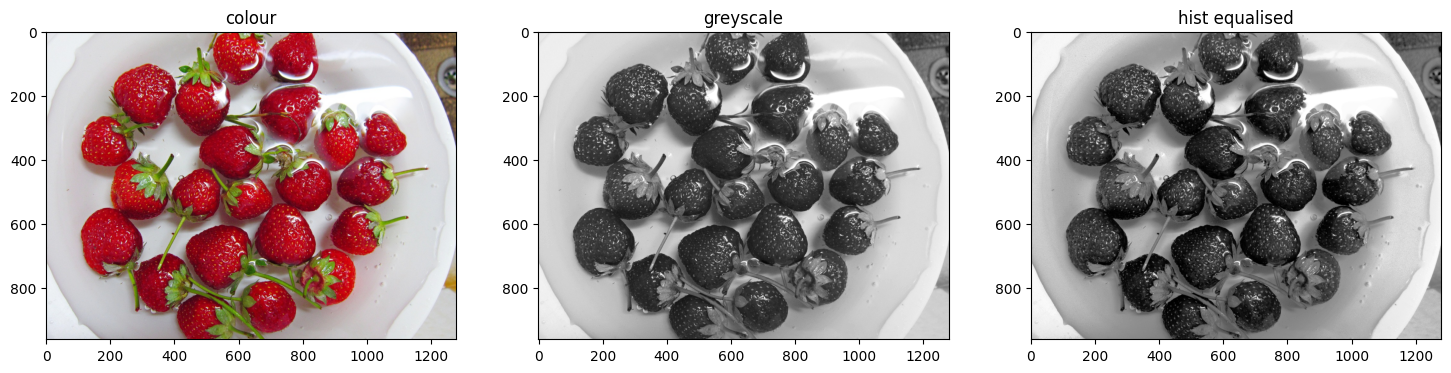

In [2]:
img = cv2.imread('/content/strawberry.jpg')
hsv_img = rgb2hsv(img)
colour = img.copy() # make a deep copy of the original image

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # conver to greyscale

img = cv2.imread('/content/strawberry.jpg', 0)  # read in as a greyscale image, alternative to line 1 and 4 combined

equ = cv2.equalizeHist(img)  # histogram equalisation

plt.figure()
plt.hist(img.ravel(),256,[0,256]);  # show histogram. numpy.ravel() - flatten an image, i.e. 2D->1D
plt.hist(equ.ravel(),256,[0,256]);
plt.title("histogram equ")

plt.figure(figsize=(18, 8))
plt.subplot(1,3,1)
plt.imshow(colour[:,:,::-1])
plt.title("colour")
plt.subplot(1,3,2)
plt.imshow(img,cmap="gray")
plt.title("greyscale")
plt.subplot(1,3,3)
plt.imshow(equ,cmap="gray")
plt.title("hist equalised")

Comparing different thresholding methods

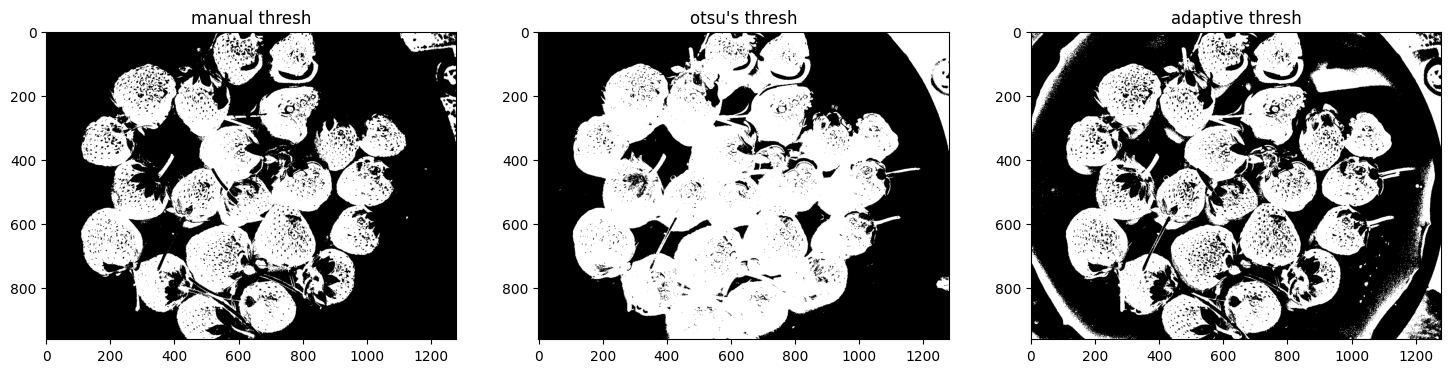

In [3]:
thresh1, bw1 = cv2.threshold(equ, thresh=90, maxval=255, type=cv2.THRESH_BINARY_INV) # manually selected threshold, low values to 255
thresh2, bw2 = cv2.threshold(equ, thresh=127, maxval=255, type=cv2.THRESH_OTSU)  # otsu's method
bw3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,301,3) # adaptive thresholding.
# 301 is block size, 3 is sigma (standard deviation)

bw2 = np.invert(bw2) # invert image, i.e. swap black and whhite
bw3 = np.invert(bw3)

plt.figure(figsize=(18, 8))
plt.subplot(1,3,1)
plt.imshow(bw1,cmap="gray")
plt.title("manual thresh")
plt.subplot(1,3,2)
plt.imshow(bw2,cmap="gray")
plt.title("otsu's thresh")
plt.subplot(1,3,3)
plt.imshow(bw3,cmap="gray")
plt.title("adaptive thresh")

plt.show()

Morphological operations for separating stawberries

Text(0.5, 1.0, 'close & erosion2')

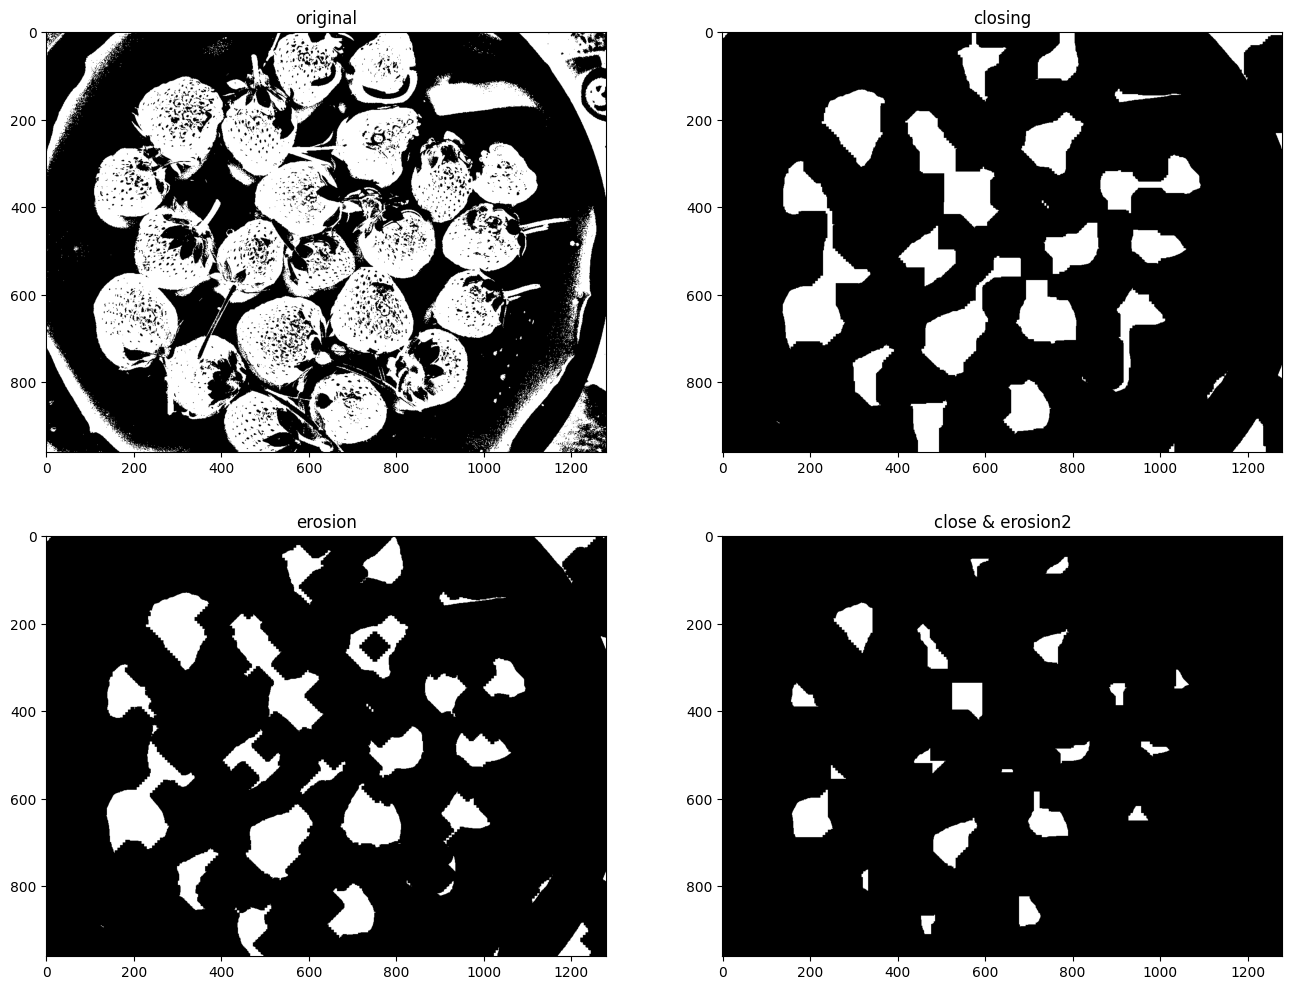

In [4]:
# create a structuring element
kernel = np.ones((3,3),np.uint8)
# closing
closing = cv2.morphologyEx(bw3, cv2.MORPH_CLOSE, kernel, iterations=4)

# erosion
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(13,13))
erosion = cv2.erode(closing,kernel,iterations = 5)

# closing
kernel = np.ones((11,11),np.uint8)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel, iterations=5)

# erosion
kernel = np.ones((7,7),np.uint8)
erosion2 = cv2.erode(closing,kernel,iterations = 6)

# remove boarder pixels
erosion2[:50, :] = 0
erosion2[:, :50] = 0
erosion2[-50:, :] = 0
erosion2[:, -50:] = 0

plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
plt.imshow(bw3,cmap="gray")
plt.title("original")
plt.subplot(2,2,2)
plt.imshow(closing,cmap="gray")
plt.title("closing")
plt.subplot(2,2,3)
plt.imshow(erosion,cmap="gray")
plt.title("erosion")
plt.subplot(2,2,4)
plt.imshow(erosion2,cmap="gray")
plt.title("close & erosion2")

Find centroids of isolated clusters/blobs

There are 21 strawberries


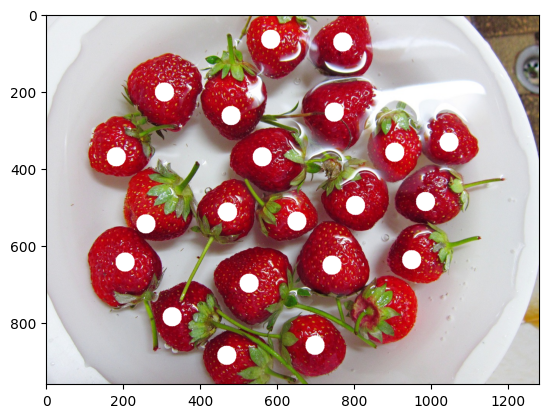

In [5]:
display = colour.copy()
labels, nlabels = ndimage.label(erosion2)  # Label features in an array. Any non-zero values in input are counted as features and zero values are considered the background.
print("There are " + str(nlabels) + " strawberries")

centroid = ndimage.center_of_mass(erosion2, labels, np.arange(nlabels) + 1 ) # calculate the center of mass of the values of an array at labels.

# draw circles representing the centroids
for cen in centroid:
  display = cv2.circle(display, (cen[1].astype(int), cen[0].astype(int)), radius=25, color=(255, 255, 255), thickness=-1)

plt.figure()
plt.imshow(display[:,:,::-1])


Use the HSV colour space as an alternative to the RGB colour space

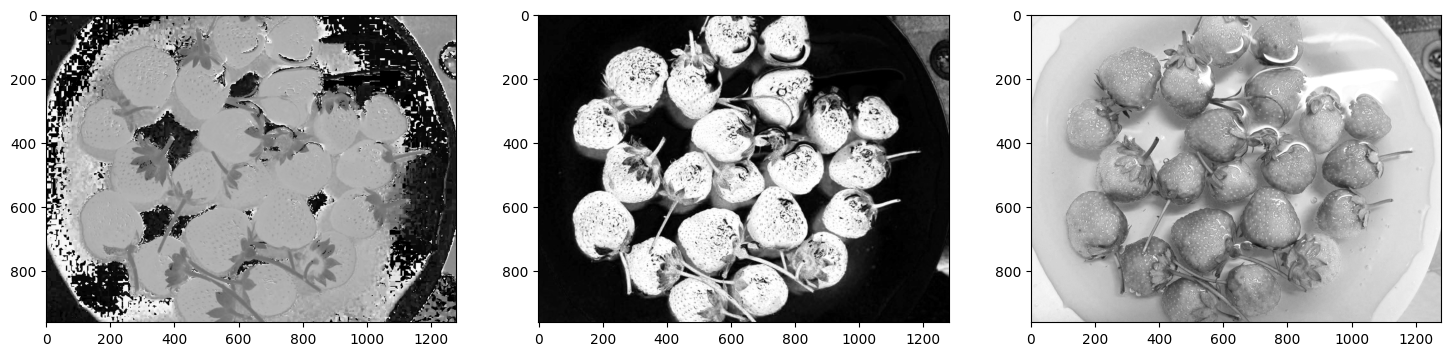

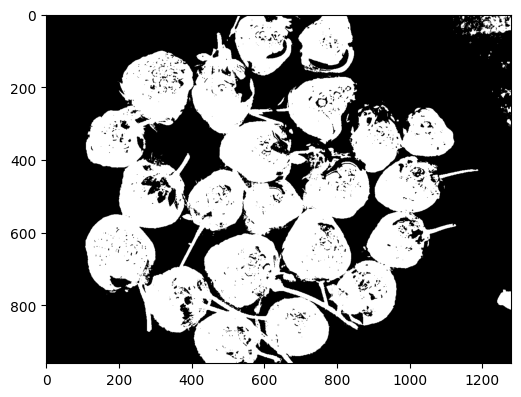

In [6]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(hsv_img[:,:,0], cmap="gray")
plt.subplot(1,3,2)
plt.imshow(hsv_img[:,:,1], cmap="gray") # select this channel
plt.subplot(1,3,3)
plt.imshow(hsv_img[:,:,2], cmap="gray")

hsv_c = (255*hsv_img[:,:,1]).astype(np.uint8) # scale data from [0, 1] to [0, 255] and convert to uint8 type

thresh_hsv, bw_hsv = cv2.threshold(hsv_c, thresh=128, maxval=255, type=cv2.THRESH_OTSU) # manually selected threshold, low values to 255

plt.figure(figsize=(6, 6))
plt.imshow(bw_hsv,cmap="gray")
